# DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.
- blob 1: distant galaxies (3 far apart)
- blob 2: bacterial absorption (5 close together)
- blob 3: neighborhood (20 medium distance)

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AffinityPropagation, SpectralClustering
%matplotlib inline

In [14]:
def blobber(centers=[[2,2],[-2,-2],[2,-2]], cluster_std=1):
# The coordinates of the centers of our blobs.

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=centers,
        cluster_std=cluster_std,
        n_features=2,
        random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

#Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)
    return X_train, X_test, y_train, y_test

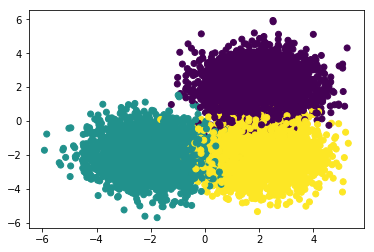

In [15]:
X_train, X_test, y_train, y_test = blobber()

In [69]:
def km_eval(n_clusters, X_train, X_test, y_train, y_test):
    # k-means
    km = KMeans(n_clusters=n_clusters, random_state=42)
    km.fit(X_train)
    train_cross = pd.crosstab(y_train,km.labels_)
    print("Train Correct: {}".format(sum([max(train_cross[r]) for r in train_cross.columns])))
    test_cross = pd.crosstab(y_test,km.predict(X_test))
    print("Test Correct: {}".format(sum([max(test_cross[r]) for r in test_cross.columns])))

In [70]:
def ms_eval(X_train, X_test, y_train, y_test):
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)
    
    # Extract cluster assignments for each data point.
    train_cross = pd.crosstab(y_train,ms.labels_)
    print("Train Correct: {}".format(sum([max(train_cross[r]) for r in train_cross.columns])))
    test_cross = pd.crosstab(y_test,ms.predict(X_test))
    print("Test Correct: {}".format(sum([max(test_cross[r]) for r in test_cross.columns])))

In [71]:
def sc_eval(n_clusters, X_train, X_test, y_train, y_test):    
    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)
    train_cross = pd.crosstab(y_train,sc.labels_)
    print("Train Correct: {}".format(sum([max(train_cross[r]) for r in train_cross.columns])))
    #test_cross = pd.crosstab(y_test,km.predict(X_test))
    #print("Test Correct: {}".format(sum([max(test_cross[r]) for r in test_cross.columns])))

In [72]:
def af_eval(X_train, X_test, y_train, y_test):
# Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation(damping = .9, convergence_iter = 3).fit(X_train)
    # Pull the number of clusters and cluster assignments for each data point.
    train_cross = pd.crosstab(y_train,af.labels_)
    print("Train Correct: {}".format(sum([max(train_cross[r]) for r in train_cross.columns])))
    test_cross = pd.crosstab(y_test,af.predict(X_test))
    print("Test Correct: {}".format(sum([max(test_cross[r]) for r in test_cross.columns])))

In [73]:
def evaluate(n_clusters, X_train, X_test, y_train, y_test):
    # OG blob
    print ("\nK Means")
    km_eval(n_clusters, X_train, X_test, y_train, y_test)

    print ("\nMean Shift")
    ms_eval(X_train, X_test, y_train, y_test)

    print ("\nSpectral Clustering")
    sc_eval(n_clusters, X_train, X_test, y_train, y_test)

    print ("\nAffinity Propagation")
    af_eval(X_train, X_test, y_train, y_test)

In [74]:
evaluate(3, X_train, X_test, y_train, y_test)


K Means
Train Correct: 969
Test Correct: 8702

Mean Shift
Train Correct: 967
Test Correct: 8694

Spectral Clustering
Train Correct: 965

Affinity Propagation
Train Correct: 965
Test Correct: 8662


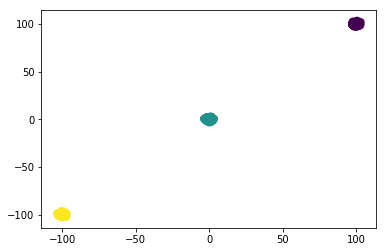


K Means
Train Correct: 1000
Test Correct: 9000

Mean Shift
Train Correct: 1000
Test Correct: 9000

Spectral Clustering


/home/conner/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Train Correct: 993

Affinity Propagation
Train Correct: 1000
Test Correct: 9000


In [76]:
# blob 1
blob_1_centers = [[100,100],[0,0],[-100,-100]]
blob_1_std = 1
blob_1_X_train, blob_1_X_test, blob_1_y_train, blob_1_y_test = blobber(blob_1_centers, blob_1_std)
evaluate(len(blob_1_centers),blob_1_X_train, blob_1_X_test, blob_1_y_train, blob_1_y_test)

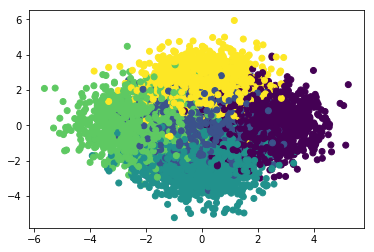


K Means
Train Correct: 713
Test Correct: 6504

Mean Shift
Train Correct: 221
Test Correct: 1813

Spectral Clustering
Train Correct: 708

Affinity Propagation
Train Correct: 703
Test Correct: 6371


In [77]:
# blob 2
blob_2_centers = [[2,0],[0,0],[0,-2],[-2,0],[0,2]]
blob_2_std = 1
blob_2_X_train, blob_2_X_test, blob_2_y_train, blob_2_y_test = blobber(blob_2_centers, blob_2_std)
evaluate(len(blob_2_centers),blob_2_X_train, blob_2_X_test, blob_2_y_train, blob_2_y_test)

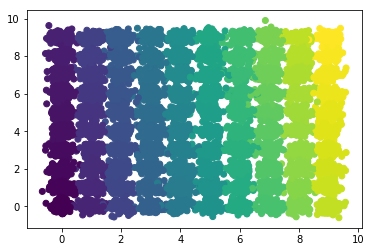


K Means
Train Correct: 946
Test Correct: 8341

Mean Shift
Train Correct: 49
Test Correct: 286

Spectral Clustering
Train Correct: 934

Affinity Propagation
Train Correct: 299
Test Correct: 2087


In [84]:
# blob 3
blob_3_centers = [[x,y] for x in range(10) for y in range(10)]
blob_3_std = .2
blob_3_X_train, blob_3_X_test, blob_3_y_train, blob_3_y_test = blobber(blob_3_centers, blob_3_std)
evaluate(len(blob_3_centers), blob_3_X_train, blob_3_X_test, blob_3_y_train, blob_3_y_test)

In [13]:
# writeup